In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [44]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [45]:
df.shape

(8124, 23)

In [46]:
df.describe()
#veil-type has only one unique valu and hence gives no information for classification

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [61]:
df = df.drop(["veil-type"],axis=1)

In [62]:
df.info()
#No missing data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8123 entries, 1 to 8123
Data columns (total 22 columns):
class                       8123 non-null int64
cap-shape                   8123 non-null int64
cap-surface                 8123 non-null int64
cap-color                   8123 non-null int64
bruises                     8123 non-null int64
odor                        8123 non-null int64
gill-attachment             8123 non-null int64
gill-spacing                8123 non-null int64
gill-size                   8123 non-null int64
gill-color                  8123 non-null int64
stalk-shape                 8123 non-null int64
stalk-root                  8123 non-null int64
stalk-surface-above-ring    8123 non-null int64
stalk-surface-below-ring    8123 non-null int64
stalk-color-above-ring      8123 non-null int64
stalk-color-below-ring      8123 non-null int64
veil-color                  8123 non-null int64
ring-number                 8123 non-null int64
ring-type                   8

In [63]:
df['class'].value_counts()

0    4208
1    3915
Name: class, dtype: int64

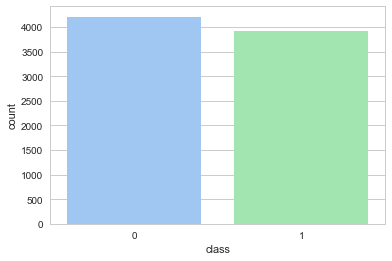

In [64]:
import seaborn as sns
sns.countplot(df['class'],label="Count")
plt.show()
#Classes are balanced

In [65]:
from sklearn import preprocessing

labelencoder=preprocessing.LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [66]:
dfmelt = pd.melt(df, id_vars = ['class'])
dfmelt.head()

,class,variable,value
0,0,cap-shape,5
1,0,cap-shape,0
2,1,cap-shape,5
3,0,cap-shape,5
4,0,cap-shape,5


[Text(0,0,'cap-shape'),
 Text(0,0,'cap-surface'),
 Text(0,0,'cap-color'),
 Text(0,0,'bruises'),
 Text(0,0,'odor'),
 Text(0,0,'gill-attachment'),
 Text(0,0,'gill-spacing'),
 Text(0,0,'gill-size'),
 Text(0,0,'gill-color'),
 Text(0,0,'stalk-shape'),
 Text(0,0,'stalk-root'),
 Text(0,0,'stalk-surface-above-ring'),
 Text(0,0,'stalk-surface-below-ring'),
 Text(0,0,'stalk-color-above-ring'),
 Text(0,0,'stalk-color-below-ring'),
 Text(0,0,'veil-color'),
 Text(0,0,'ring-number'),
 Text(0,0,'ring-type'),
 Text(0,0,'spore-print-color'),
 Text(0,0,'population'),
 Text(0,0,'habitat')]

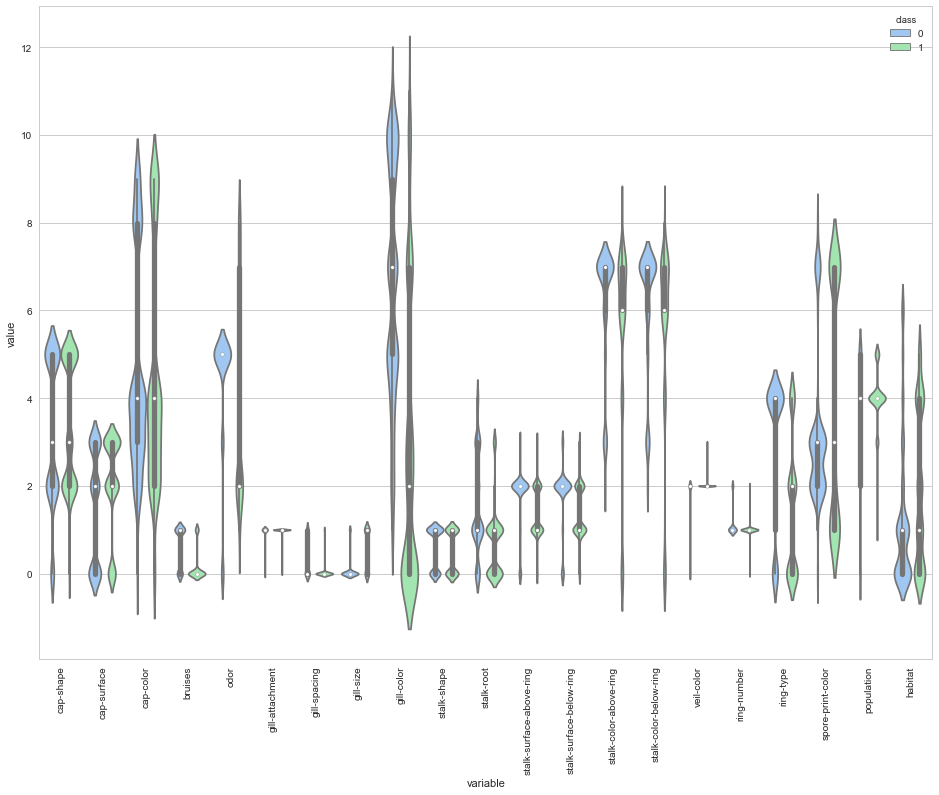

In [67]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

f, ax = plt.subplots(figsize=(16, 12))

p = sns.violinplot(x="variable", y="value", hue="class", data=dfmelt)
p.set_xticklabels(rotation = 90, labels = list(df.drop(["class"],axis = 1).columns))

#Violin plot to understand the relationship between label and features. Feature odor seems to separate classes.

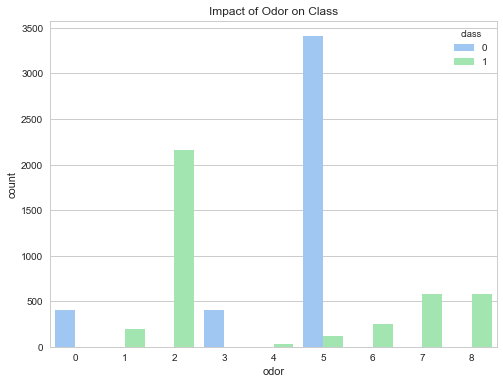

In [80]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x= 'odor', data=df, hue='class')
plt.title("Impact of Odor on Class")
plt.show()

#Odor classifies Class well that only at labelencoded 5 both the classes appear

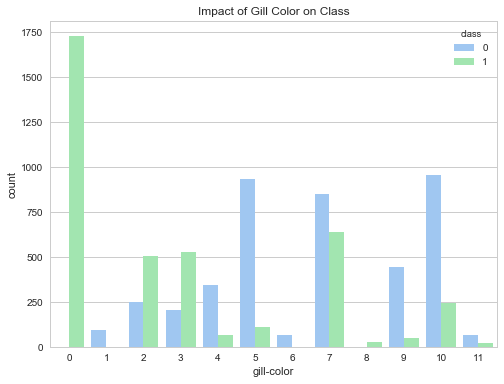

In [82]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x= 'gill-color', data=df, hue='class')
plt.title("Impact of Gill Color on Class")
plt.show()

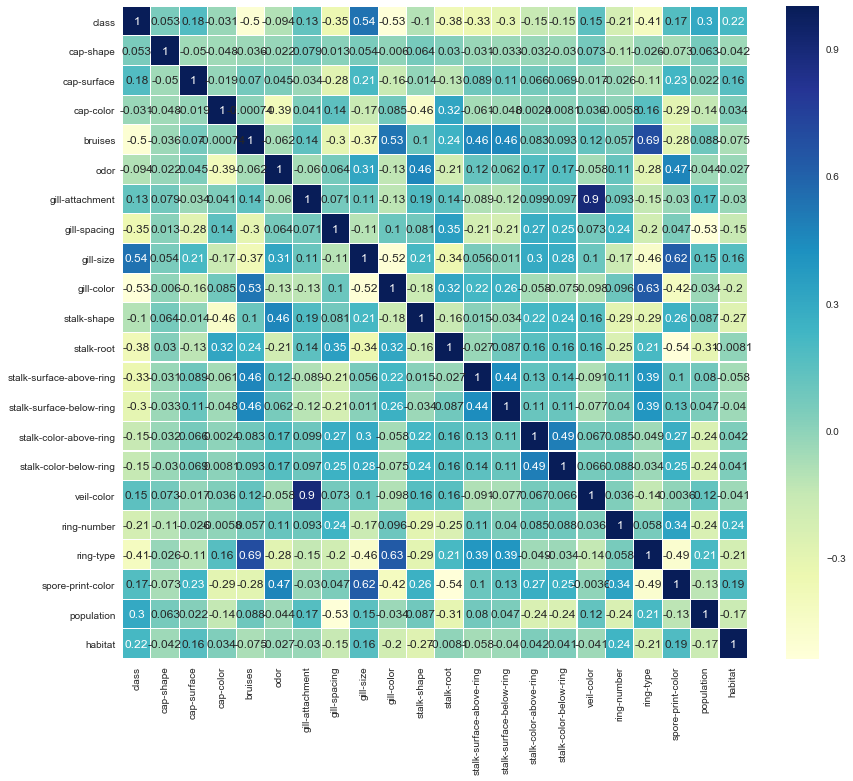

In [76]:
plt.figure(figsize=(14,12))
corr = df.corr()
sns.heatmap(corr,linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

#The below correlation table based on the label encoded features will not give actual correlation.

In [96]:
from scipy.stats import chi2_contingency

In [97]:
columname = []
pvalue = []
for column in ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']:
    csq=chi2_contingency(pd.crosstab(df['class'], df[column]))
    columname.append(column)
    pvalue.append(csq[1])

mapped = set(zip(columname,pvalue))
print(mapped)    

#As all the p_values are less than 0.05 ,labels are dependant on all the features

{('gill-size', 0.0), ('stalk-shape', 5.1652543327614597e-20), ('cap-shape', 1.1571674036608471e-103), ('stalk-surface-above-ring', 0.0), ('odor', 0.0), ('stalk-surface-below-ring', 0.0), ('gill-spacing', 5.791122609608697e-216), ('stalk-color-below-ring', 0.0), ('stalk-root', 3.978167279209826e-290), ('gill-color', 0.0), ('cap-surface', 6.310715858337401e-68), ('veil-color', 3.394518760091574e-41), ('spore-print-color', 0.0), ('gill-attachment', 5.618495092351532e-31), ('bruises', 0.0), ('stalk-color-above-ring', 0.0), ('cap-color', 5.609094426464265e-78), ('ring-type', 0.0), ('ring-number', 4.461331260570228e-82), ('habitat', 0.0), ('population', 0.0)}


In [98]:
X = df[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']]
Y = df["class"]

X_dummy = pd.get_dummies(X)

X_dummy.shape

(8123, 21)

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_dummy, Y, test_size=0.3, random_state=42)

rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [114]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,roc_curve, roc_auc_score

rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='gini')
rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)
predprob = rfc1.predict_proba(x_test)
print("Accuracy: ",accuracy_score(y_test,pred))

Accuracy:  1.0


In [115]:
features_list = features_list = X.columns.values
feature_importance = rfc1.feature_importances_
sorted_idx = np.argsort(feature_importance)
print(feature_importance)
print(sorted_idx)

[0.00312141 0.00798231 0.01249962 0.05093907 0.18246185 0.00208728
 0.03519427 0.12899805 0.12180281 0.01888278 0.05871073 0.04483998
 0.03925599 0.01634891 0.02120604 0.0018901  0.0140145  0.07096385
 0.09044798 0.0553034  0.02304906]
[15  5  0  1  2 16 13  9 14 20  6 12 11  3 19 10 17 18  8  7  4]


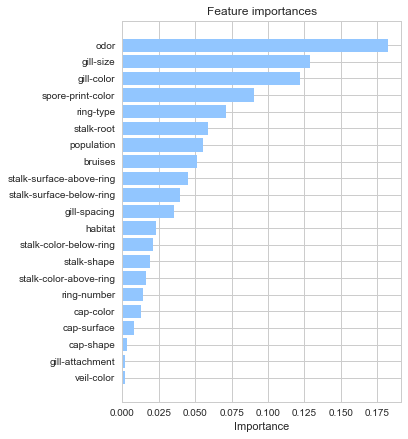

In [116]:
plt.figure(figsize=(5,7))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.show()

In [113]:
print(f1_score(y_test, pred, average="macro"))
print(precision_score(y_test, pred, average="macro"))
print(recall_score(y_test, pred, average="macro"))    

1.0
1.0
1.0


1.0


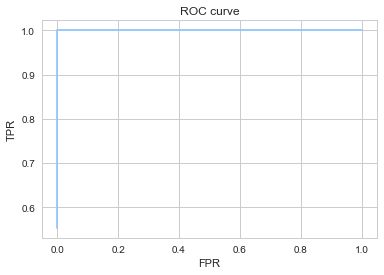

In [120]:
print(roc_auc_score(y_test, predprob[:,1]))

fpr, tpr, _ = roc_curve(y_test, predprob[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

[[1274    0]
 [   0 1163]]


Text(0.5,1,'Confusion Matrix')

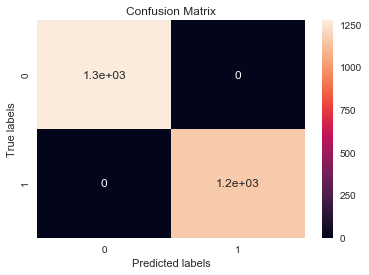

In [122]:
results = confusion_matrix(y_test, pred)
ax= plt.subplot()
sns.heatmap(results, annot=True, ax = ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')